<h1><center><b> Swire Coca-Cola Capstone EDA - Group 8 </b></center></h1>

<center><img src="swire coca cola.png" width="500" alt="swire coca cola logo "/></center>

 <center><b><h2> Authors : Adarsh Fnu,Charith Reddy Gopavaram,Dheeraj Yata </h2></b></center>

## Table of contents:

1. <a href="#1">Introduction</a><br>
2. <a href="#2">Load libraries and packages</a><br>    
3. <a href="#3"> Import dataset and inspect</a><br>
4. <a href="#4"> Missing Value Analysis</a><br>
   4.1 <a href="#4.1"> Imputation of Missing Value's</a><br>
5. <a href="#5"> Univariate Analysis</a><br>
   5.1 <a href="#5.1"> Distribution of actual work in minutes</a><br>
   5.2 <a href="#5.2"> Breakdown counts by production location</a><br>
   5.3 <a href="#5.3"> Breakdown trends over years</a><br>
   5.4 <a href="#5.4"> Number of maintenance activities per month in 2023</a><br>
   5.5 <a href="#5.5"> Frequency of maintenance activity type</a><br>   
6. <a href="#6"> Bivariate Analysis</a><br>
   6.1 <a href="#6.1"> Average downtime by maintenance activity type</a><br>
   6.2 <a href="#6.2"> Average downtime by plant</a><br>
   6.3 <a href="#6.3"> Count of Maintenance type by Maintenance acitvity type</a><br>
   6.4 <a href="#6.4"> Production line Analysis using Functional Area </a><br>
    <div style="margin-left: 20px;">
    6.4.1 <a href="#6.4.1"> Average downtime by Functional Area node 4</a><br>
    6.4.2 <a href="#6.4.2"> Average downtime by Functional Area node 5</a><br>
  </div>
   6.5 <a href="#6.5"> Frequency of maintenance type across equipment categories </a><br>
   6.6 <a href="#6.6"> Equipment Age vs Actual work in minutes  </a><br>
7. <a href="#7"> Multivariate Analysis</a><br>
   7.1 <a href="#7.1"> Average downtime by maintenance activity type for different plants</a><br>
   7.2 <a href="#6.6"> Maintenance type by equipment age and downtime</a><br>   
8. <a href="#8"> Outlier Analysis</a><br>
9. <a href="#9"> Summary of EDA</a><br>
10. <a href="#10"> Group Member's Contribution</a><br>

## 1. Introduction <a name='1'></a>

Swire Coca-Cola is one of the five largest Coca-Cola bottlers in the US. Every year, they produce
close to 192 million cases of beverages to sell in its markets in 13 states. Recently, Swire CocaCola is experiencing significant losses due to frequent and unplanned machine downtimes in its 6
production plants. These machine downtimes are costing the company greatly as only about 94.4%
of ordered cases get produced while the rest are lost in unexpected mechanical failures. When
these mechanical failures occur unexpectedly, there are unplanned downtimes that reduce
efficiency and productivity at the plants. Due to these unplanned breakdowns, it costs the business
an estimated $60 million annually, bringing business to a grinding halt and delaying the time for
delivery. The current maintenance strategy is inefficient, as machines are repaired only after
breakdown occur, resulting in prolonged periods of inactivity. Swire Coca-Cola wants to further
improve the accuracy of these downtime predictions in order to avoid disruptions, decrease the
cost of unplanned maintenance, and optimize full production capacity.

The project aims to implement predictive maintenance at Swire Coca-Cola to proactively identify potential machine failures before they occur. This will reduce unplanned downtimes, decrease maintenance costs, and optimize production capacity. The goal is to improve operational efficiency, ensure prompt delivery, and boost profitability. Ultimately, it will help Swire Coca-Cola maintain competitiveness and enhance customer satisfaction.

Before going to the modeling, As a step within the CRISP-DM cycle, let's delve into the data understanding following our comprehension of the Business Problem Statement.

* Import and inspect dataset
* Missing values analysis 
* Exploratory visualizations
* Univariate analysis
* Bivariate analysis
* Multivariate analysis
* Outlier analysis



## 2. Load Libraries and packages <a name='2'></a>

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

## 3. Import dataset and inspect <a name='3'></a>

In [5]:
data_swire = pd.read_csv('IWC_Work_Orders_Extract (1).csv', low_memory=False)

data_swire_copy = data_swire.copy()

data_swire_copy.head(n=10)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,NaN,NaN,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
5,704948720,G291,MONZA,2023-09-08,2023-09-08,07:00:00.000,07:00:00.000,18.0,G291VM1437,40534.0,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
6,701673970,G291,MONZA,2019-09-06,2019-09-06,07:00:00.000,07:00:00.000,480.0,NaN,NaN,...,AIR SYSTEMS,NaN,NaN,NaN,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
7,705148892,G291,MONZA,2023-10-09,2023-10-09,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31
8,704769592,G291,MONZA,2023-05-01,2023-05-01,07:00:00.000,07:00:00.000,30.0,NaN,NaN,...,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31
9,704448350,G291,MONZA,2022-12-13,2022-12-13,08:00:00.000,08:00:00.000,30.0,NaN,NaN,...,AMMONIA & REFRIGERATION SYSTEMS,NaN,NaN,NaN,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31


In [6]:
# Check column names and data types
data_swire_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427264 entries, 0 to 1427263
Data columns (total 25 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   ORDER_ID                         1427264 non-null  int64  
 1   PLANT_ID                         1427264 non-null  object 
 2   PRODUCTION_LOCATION              1427264 non-null  object 
 3   EXECUTION_START_DATE             1427264 non-null  object 
 4   EXECUTION_FINISH_DATE            1427264 non-null  object 
 5   ACTUAL_START_TIME                1427264 non-null  object 
 6   ACTUAL_FINISH_TIME               1427264 non-null  object 
 7   ACTUAL_WORK_IN_MINUTES           1427264 non-null  float64
 8   MAINTENANCE_PLAN                 152594 non-null   object 
 9   MAINTENANCE_ITEM                 152594 non-null   float64
 10  MAINTENANCE_ACTIVITY_TYPE        1427264 non-null  object 
 11  ORDER_DESCRIPTION                291767 non-null  

The dataset comprises 1,427,264 entries across 25 columns, containing a mix of integer, float, and object data types. The integer (ORDER_ID) and float (ACTUAL_WORK_IN_MINUTES, MAINTENANCE_ITEM, and EQUIPMENT_ID) columns represent identifiers and numerical values, while the majority of columns (21) are of type object, which likely includes categorical or date-related information. Several columns related to dates, such as EXECUTION_START_DATE, EXECUTION_FINISH_DATE, and EQUIP_START_UP_DATE, are in object format and should be converted to datetime for accurate temporal analysis. Notably, some columns, such as MAINTENANCE_PLAN, MAINTENANCE_ITEM, and EQUIP_VALID_FROM, exhibit a significant number of missing values, indicating incomplete records that require appropriate handling. Effective imputation strategies for missing values, categorical encoding, and outlier analysis are recommended to ensure data quality and support predictive modeling.

In [7]:
data_swire_copy.shape

(1427264, 25)

The dataset has a shape of (1,427,264, 25), indicating that it comprises 1,427,264 rows and 25 columns. The large number of rows suggests the data was collected over a considerable period or from multiple sources, which provides a rich dataset for analysis. The 25 columns represent various attributes related to equipment, maintenance activities, and operational details, offering a broad set of features that could be valuable for predictive maintenance analysis.



In [8]:
data_swire_copy.dtypes

ORDER_ID                             int64
PLANT_ID                            object
PRODUCTION_LOCATION                 object
EXECUTION_START_DATE                object
EXECUTION_FINISH_DATE               object
ACTUAL_START_TIME                   object
ACTUAL_FINISH_TIME                  object
ACTUAL_WORK_IN_MINUTES             float64
MAINTENANCE_PLAN                    object
MAINTENANCE_ITEM                   float64
MAINTENANCE_ACTIVITY_TYPE           object
ORDER_DESCRIPTION                   object
MAINTENANCE_TYPE_DESCRIPTION        object
FUNCTIONAL_LOC                      object
FUNCTIONAL_AREA_NODE_1_MODIFIED     object
FUNCTIONAL_AREA_NODE_2_MODIFIED     object
FUNCTIONAL_AREA_NODE_3_MODIFIED     object
FUNCTIONAL_AREA_NODE_4_MODIFIED     object
FUNCTIONAL_AREA_NODE_5_MODIFIED     object
EQUIPMENT_ID                       float64
EQUIPMENT_DESC                      object
EQUIP_CAT_DESC                      object
EQUIP_START_UP_DATE                 object
EQUIP_VALID

In [9]:
data_swire_copy.columns

Index(['ORDER_ID', 'PLANT_ID', 'PRODUCTION_LOCATION', 'EXECUTION_START_DATE',
       'EXECUTION_FINISH_DATE', 'ACTUAL_START_TIME', 'ACTUAL_FINISH_TIME',
       'ACTUAL_WORK_IN_MINUTES', 'MAINTENANCE_PLAN', 'MAINTENANCE_ITEM',
       'MAINTENANCE_ACTIVITY_TYPE', 'ORDER_DESCRIPTION',
       'MAINTENANCE_TYPE_DESCRIPTION', 'FUNCTIONAL_LOC',
       'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED',
       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED',
       'FUNCTIONAL_AREA_NODE_5_MODIFIED', 'EQUIPMENT_ID', 'EQUIPMENT_DESC',
       'EQUIP_CAT_DESC', 'EQUIP_START_UP_DATE', 'EQUIP_VALID_FROM',
       'EQUIP_VALID_TO'],
      dtype='object')

In [10]:
data_swire_copy.isnull().sum()

ORDER_ID                                 0
PLANT_ID                                 0
PRODUCTION_LOCATION                      0
EXECUTION_START_DATE                     0
EXECUTION_FINISH_DATE                    0
ACTUAL_START_TIME                        0
ACTUAL_FINISH_TIME                       0
ACTUAL_WORK_IN_MINUTES                   0
MAINTENANCE_PLAN                   1274670
MAINTENANCE_ITEM                   1274670
MAINTENANCE_ACTIVITY_TYPE                0
ORDER_DESCRIPTION                  1135497
MAINTENANCE_TYPE_DESCRIPTION       1135469
FUNCTIONAL_LOC                     1135482
FUNCTIONAL_AREA_NODE_1_MODIFIED    1137147
FUNCTIONAL_AREA_NODE_2_MODIFIED    1144857
FUNCTIONAL_AREA_NODE_3_MODIFIED    1168573
FUNCTIONAL_AREA_NODE_4_MODIFIED    1189691
FUNCTIONAL_AREA_NODE_5_MODIFIED    1425084
EQUIPMENT_ID                       1135469
EQUIPMENT_DESC                     1347817
EQUIP_CAT_DESC                     1347817
EQUIP_START_UP_DATE                1347817
EQUIP_VALID

## 4. Missing Value analysis <a name='4'></a>

In [11]:
# Calculate the percentage of missing values for each column
missing_values_percentage = data_swire_copy.isnull().mean() * 100

# Filter out columns that have no missing values
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

print(missing_values_percentage)

MAINTENANCE_PLAN                   89.308635
MAINTENANCE_ITEM                   89.308635
ORDER_DESCRIPTION                  79.557601
MAINTENANCE_TYPE_DESCRIPTION       79.555639
FUNCTIONAL_LOC                     79.556550
FUNCTIONAL_AREA_NODE_1_MODIFIED    79.673207
FUNCTIONAL_AREA_NODE_2_MODIFIED    80.213401
FUNCTIONAL_AREA_NODE_3_MODIFIED    81.875042
FUNCTIONAL_AREA_NODE_4_MODIFIED    83.354656
FUNCTIONAL_AREA_NODE_5_MODIFIED    99.847260
EQUIPMENT_ID                       79.555639
EQUIPMENT_DESC                     94.433616
EQUIP_CAT_DESC                     94.433616
EQUIP_START_UP_DATE                94.433616
EQUIP_VALID_FROM                   94.433616
EQUIP_VALID_TO                     94.433616
dtype: float64


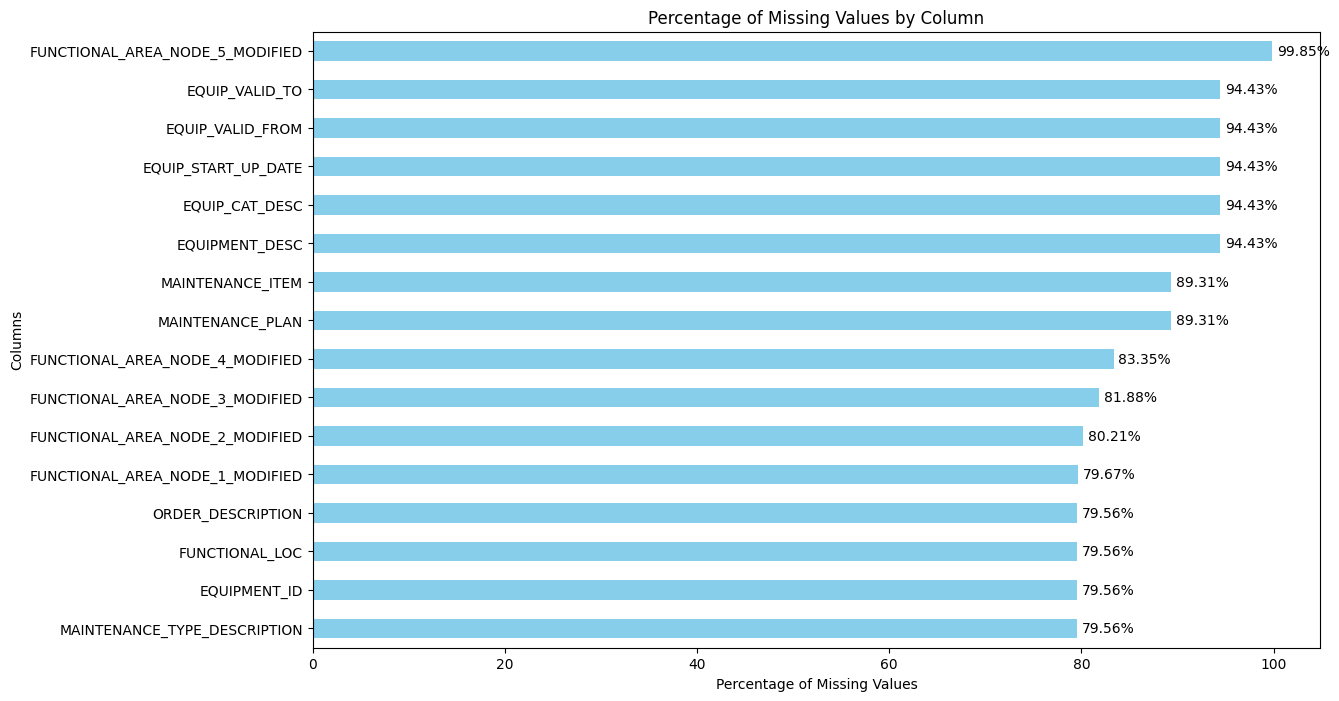

In [12]:
# Plotting the bar plot
plt.figure(figsize=(13, 8))
missing_values_percentage.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.title('Percentage of Missing Values by Column')

# Add numerical values on the bars
for index, value in enumerate(missing_values_percentage.sort_values()):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center')

plt.show()

The missing value analysis reveals that several columns in the dataset have a significant proportion of missing data, ranging from approximately 79.5% to 99.8%. Notably, columns like MAINTENANCE_PLAN and MAINTENANCE_ITEM have around 89.3% missing values, indicating potential data quality issues or inconsistent record-keeping in maintenance documentation. Furthermore, the EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO columns each have 94.4% missing values, which highlights considerable gaps in equipment lifecycle data. The FUNCTIONAL_AREA_NODE_5_MODIFIED column is missing values for almost 99.8% of the records, suggesting that information at this level of detail might not have been recorded consistently or may only apply to specific equipment types. Addressing these missing values will be crucial for ensuring robust data quality and reliability in subsequent analyses and predictive modeling efforts.

### 4.1 Imputation of Missing Value's <a name = "4.1"></a>

In [13]:
categorical_columns = ['MAINTENANCE_PLAN', 'MAINTENANCE_ITEM', 'ORDER_DESCRIPTION', 'MAINTENANCE_TYPE_DESCRIPTION', 
                       'FUNCTIONAL_LOC', 'FUNCTIONAL_AREA_NODE_1_MODIFIED', 'FUNCTIONAL_AREA_NODE_2_MODIFIED', 
                       'FUNCTIONAL_AREA_NODE_3_MODIFIED', 'FUNCTIONAL_AREA_NODE_4_MODIFIED', 'FUNCTIONAL_AREA_NODE_5_MODIFIED', 
                       'EQUIPMENT_ID', 'EQUIPMENT_DESC', 'EQUIP_CAT_DESC']

for col in categorical_columns:
    data_swire_copy[col] = data_swire_copy[col].fillna('Unknown')
    
data_swire_copy['EQUIP_START_UP_DATE'] = pd.to_datetime(data_swire_copy['EQUIP_START_UP_DATE'], errors='coerce')
data_swire_copy['EQUIP_START_UP_DATE'] = data_swire_copy['EQUIP_START_UP_DATE'].fillna(pd.to_datetime('1900-01-01'))

data_swire_copy['EQUIP_VALID_FROM'] = np.where(
    data_swire_copy['EQUIP_VALID_FROM'].isna(), 
    data_swire_copy['EQUIP_START_UP_DATE'] + pd.Timedelta(days=0), 
    data_swire_copy['EQUIP_VALID_FROM']
)
    
data_swire_copy.fillna({'EQUIP_VALID_TO': pd.to_datetime('2200-01-01')}, inplace=True)


data_swire_copy['EQUIPMENT_DESC'] = data_swire_copy['EQUIPMENT_DESC'].fillna(data_swire_copy['EQUIPMENT_DESC'].mode()[0])
data_swire_copy['EQUIP_CAT_DESC'] = data_swire_copy['EQUIP_CAT_DESC'].fillna(data_swire_copy['EQUIP_CAT_DESC'].mode()[0])



For categorical columns, such as MAINTENANCE_PLAN, ORDER_DESCRIPTION, and several FUNCTIONAL_AREA_NODE columns, missing values are replaced with 'Unknown' to ensure data completeness without introducing bias. Date columns like EQUIP_START_UP_DATE, EQUIP_VALID_FROM, and EQUIP_VALID_TO are converted to datetime format and missing entries are filled with placeholder dates (e.g., 1900-01-01 for startup dates and 2200-01-01 for end-of-use dates), enabling meaningful time-based analysis while avoiding data loss. For all rows where EQUIP_VALID_FROM is missing, we are imputing the equipment's start-up date (EQUIP_START_UP_DATE) as the valid-from date, meaning the equipment is considered valid from the date it was initially acquired. This ensures there are no gaps in the EQUIP_VALID_FROM column. Additionally, the most common value (mode) is used to fill missing values in EQUIPMENT_DESC and EQUIP_CAT_DESC to retain categorical consistency. These imputation techniques ensure that the dataset remains comprehensive and ready for further exploration and modeling, without dropping any rows or losing essential information.








In [14]:
data_swire_copy.isnull().sum()

ORDER_ID                           0
PLANT_ID                           0
PRODUCTION_LOCATION                0
EXECUTION_START_DATE               0
EXECUTION_FINISH_DATE              0
ACTUAL_START_TIME                  0
ACTUAL_FINISH_TIME                 0
ACTUAL_WORK_IN_MINUTES             0
MAINTENANCE_PLAN                   0
MAINTENANCE_ITEM                   0
MAINTENANCE_ACTIVITY_TYPE          0
ORDER_DESCRIPTION                  0
MAINTENANCE_TYPE_DESCRIPTION       0
FUNCTIONAL_LOC                     0
FUNCTIONAL_AREA_NODE_1_MODIFIED    0
FUNCTIONAL_AREA_NODE_2_MODIFIED    0
FUNCTIONAL_AREA_NODE_3_MODIFIED    0
FUNCTIONAL_AREA_NODE_4_MODIFIED    0
FUNCTIONAL_AREA_NODE_5_MODIFIED    0
EQUIPMENT_ID                       0
EQUIPMENT_DESC                     0
EQUIP_CAT_DESC                     0
EQUIP_START_UP_DATE                0
EQUIP_VALID_FROM                   0
EQUIP_VALID_TO                     0
dtype: int64

In [15]:
data_swire_copy.head(n=10)

,ORDER_ID,PLANT_ID,PRODUCTION_LOCATION,EXECUTION_START_DATE,EXECUTION_FINISH_DATE,ACTUAL_START_TIME,ACTUAL_FINISH_TIME,ACTUAL_WORK_IN_MINUTES,MAINTENANCE_PLAN,MAINTENANCE_ITEM,...,FUNCTIONAL_AREA_NODE_2_MODIFIED,FUNCTIONAL_AREA_NODE_3_MODIFIED,FUNCTIONAL_AREA_NODE_4_MODIFIED,FUNCTIONAL_AREA_NODE_5_MODIFIED,EQUIPMENT_ID,EQUIPMENT_DESC,EQUIP_CAT_DESC,EQUIP_START_UP_DATE,EQUIP_VALID_FROM,EQUIP_VALID_TO
0,705642457,G812,ROMA,2024-05-04,2024-05-12,06:00:00.000,23:04:08.000,390.0,Unknown,Unknown,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
1,704191697,G812,ROMA,2022-09-13,2022-09-13,06:00:00.000,17:17:24.000,420.0,Unknown,Unknown,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
2,704466547,G812,ROMA,2022-12-21,2022-12-21,07:00:00.000,07:00:00.000,30.0,Unknown,Unknown,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
3,703834477,G812,ROMA,2022-07-04,2022-07-04,06:00:00.000,06:00:00.000,60.0,Unknown,Unknown,...,G812 PRD FILLER_ROTARY_CAN,G812 PRD FILLER_ROTARY_CAN LINE 3,CONVEYOR,FULL CAN CONVEYOR,300126812.0,FULL CAN CONVEYOR (FC41B),Machines,2020-04-22,2020-02-10,9999-12-31
4,704661125,G291,MONZA,2023-03-15,2023-03-15,07:00:00.000,07:00:00.000,120.0,Unknown,Unknown,...,AIR SYSTEMS,Unknown,Unknown,Unknown,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
5,704948720,G291,MONZA,2023-09-08,2023-09-08,07:00:00.000,07:00:00.000,18.0,G291VM1437,40534.0,...,AIR SYSTEMS,Unknown,Unknown,Unknown,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
6,701673970,G291,MONZA,2019-09-06,2019-09-06,07:00:00.000,07:00:00.000,480.0,Unknown,Unknown,...,AIR SYSTEMS,Unknown,Unknown,Unknown,300001088.0,TANK_STL_STOR_AIR,Machines,2017-02-15,2023-12-11,9999-12-31
7,705148892,G291,MONZA,2023-10-09,2023-10-09,07:00:00.000,07:00:00.000,30.0,Unknown,Unknown,...,AMMONIA & REFRIGERATION SYSTEMS,Unknown,Unknown,Unknown,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31
8,704769592,G291,MONZA,2023-05-01,2023-05-01,07:00:00.000,07:00:00.000,30.0,Unknown,Unknown,...,AMMONIA & REFRIGERATION SYSTEMS,Unknown,Unknown,Unknown,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31
9,704448350,G291,MONZA,2022-12-13,2022-12-13,08:00:00.000,08:00:00.000,30.0,Unknown,Unknown,...,AMMONIA & REFRIGERATION SYSTEMS,Unknown,Unknown,Unknown,300001033.0,PUMP_RECIP_HIGH_PRESSURE_NF,Machines,2017-02-15,2023-12-11,9999-12-31


## 5.Univariate analysis <a name = "5"></a>

In the context of predictive maintenance for Swire Coca-Cola, univariate analysis is essential to understand the distribution of each feature, such as maintenance duration (ACTUAL_WORK_IN_MINUTES) or maintenance types. By analyzing each variable independently, we can identify key characteristics, such as the frequency of unplanned vs. planned maintenance or the age distribution of the equipment. 

In [16]:
data_swire_copy['ACTUAL_WORK_IN_MINUTES'].describe().round(2)

count    1427264.00
mean          88.63
std          803.79
min            0.00
25%           12.00
50%           48.00
75%           90.00
max       330184.80
Name: ACTUAL_WORK_IN_MINUTES, dtype: float64

The summary statistics for ACTUAL_WORK_IN_MINUTES show that the dataset contains 142,264 records for the duration of work performed on maintenance tasks, with a mean of 88.63 minutes. The standard deviation is 803.79 minutes, indicating a high variability in the time taken for maintenance activities. The minimum recorded value is 0 minutes, suggesting instances where no significant work was logged, which may represent very minor fixes or erroneous data. The median (50th percentile) value is 48 minutes, while the 25th and 75th percentiles are 12 minutes and 90 minutes, respectively, showing that most maintenance tasks are relatively short. However, the maximum value of 330,184.80 minutes highlights some extreme outliers, possibly due to extended downtimes or misrecorded data, which may require further investigation and handling during analysis. Overall, these statistics suggest a skewed distribution, with most maintenance activities being short in duration, while a few instances are significantly longer.








### 5.1. Distribution of actual work in minutes <a name = "5.1"></a>

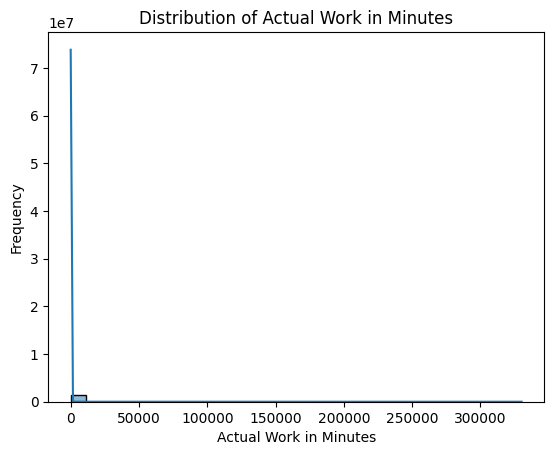

In [17]:
warnings.filterwarnings("ignore", category=FutureWarning, module="pandas")

sns.histplot(data_swire_copy['ACTUAL_WORK_IN_MINUTES'], bins=30, kde=True)
plt.title('Distribution of Actual Work in Minutes')
plt.xlabel('Actual Work in Minutes')
plt.ylabel('Frequency')
plt.show()


From the above graph, which is between actual work in minutes and frequency, we can see that there is a massive spike at zero, which means that most of the downtimes which occur are small fixes or minor issues that require significantly less time to resolve the problem which doesn't affect the production. However, the outliers which exceed more than 1000 minutes are likely to be unplanned maintenance, where the repairs are difficult and take a considerable amount of time to do so, which affects the production and the cost in the millions, even if these repairs are rare but predicting them in advance can reduce the impact they cause.

### 5.2. Breakdown counts by production location <a name = "5.2"></a>

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/717436967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')


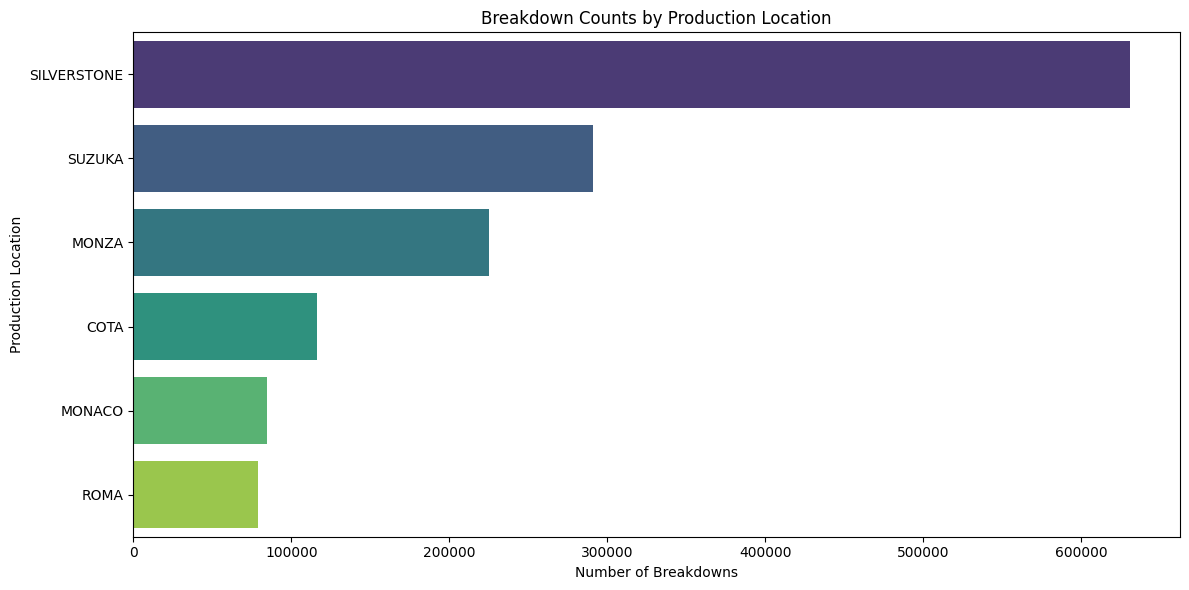

In [18]:
plt.figure(figsize=(12, 6))
location_counts = data_swire_copy['PRODUCTION_LOCATION'].value_counts()
sns.barplot(x=location_counts.values, y=location_counts.index, palette='viridis')
plt.title('Breakdown Counts by Production Location')
plt.xlabel('Number of Breakdowns')
plt.ylabel('Production Location')
plt.tight_layout()
plt.show()


The bar chart shows the breakdown counts by production location, with "Silverstone" having the highest number of breakdowns, significantly surpassing other locations. "Suzuka" follows as the second highest, and "Monza" ranks third. The other locations—"COTA," "Monaco," and "Roma"—have relatively lower breakdown counts compared to the top three. This visualization highlights that Silverstone is experiencing the most operational issues, indicating the need for focused maintenance strategies to address the frequent breakdowns and improve efficiency in this location.









### 5.3. Breakdown trends over years <a name = "5.3"></a>

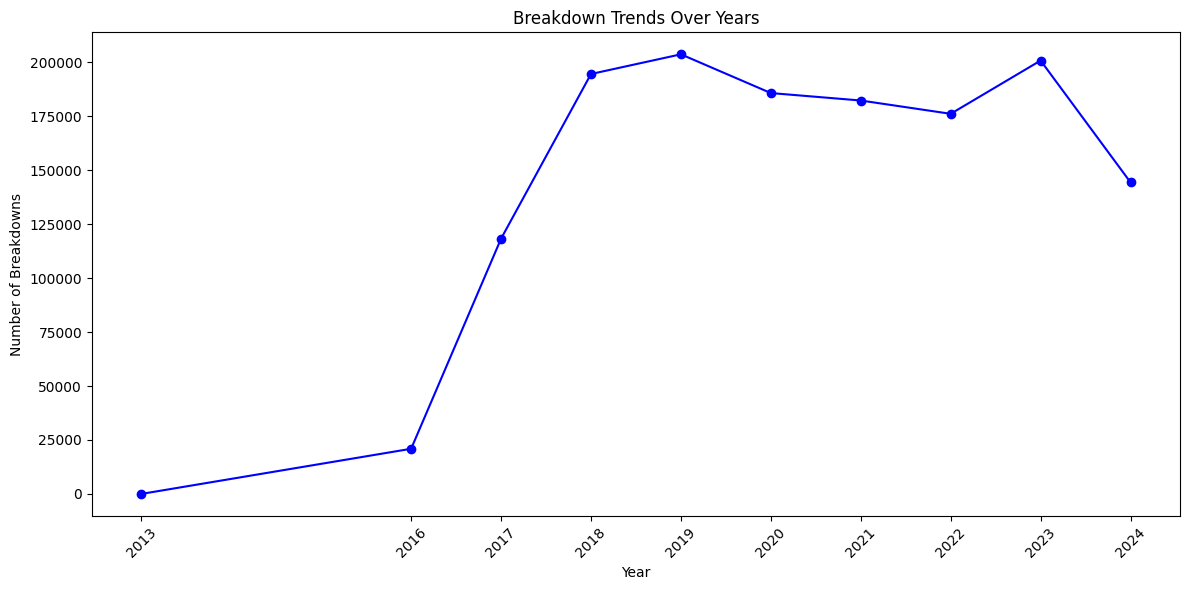

In [19]:
# Convert 'EXECUTION_START_DATE' to datetime format
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'], errors='coerce')

# Grouping breakdowns by year 
breakdown_trends_yearly = data_swire_copy['EXECUTION_START_DATE'].groupby(data_swire_copy['EXECUTION_START_DATE'].dt.year).count()

# Plotting breakdown trends over time by year
plt.figure(figsize=(12, 6))
breakdown_trends_yearly.plot(kind='line', marker='o', color='b')
plt.title('Breakdown Trends Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Breakdowns')
plt.xticks(breakdown_trends_yearly.index, rotation=45)

plt.tight_layout()
plt.show()

The line graph depicts the breakdown trends over the years, showing a notable increase in the number of breakdowns from 2015 to 2018, reaching its peak around 2019. This indicates a period of operational challenges and frequent machine failures. Post-2019, there seems to be a stabilization in the number of breakdowns, although still relatively high, with slight fluctuations between 2020 and 2023. In 2024, a significant decrease in breakdowns is observed, suggesting possible improvements in maintenance practices or a decline in production activities that could have reduced the number of incidents. This trend emphasizes the need for further analysis of factors contributing to the fluctuations in breakdown occurrences, especially during peak periods.

### 5.4. Number of maintenance activites per month in 2023 <a name = "5.4"></a>

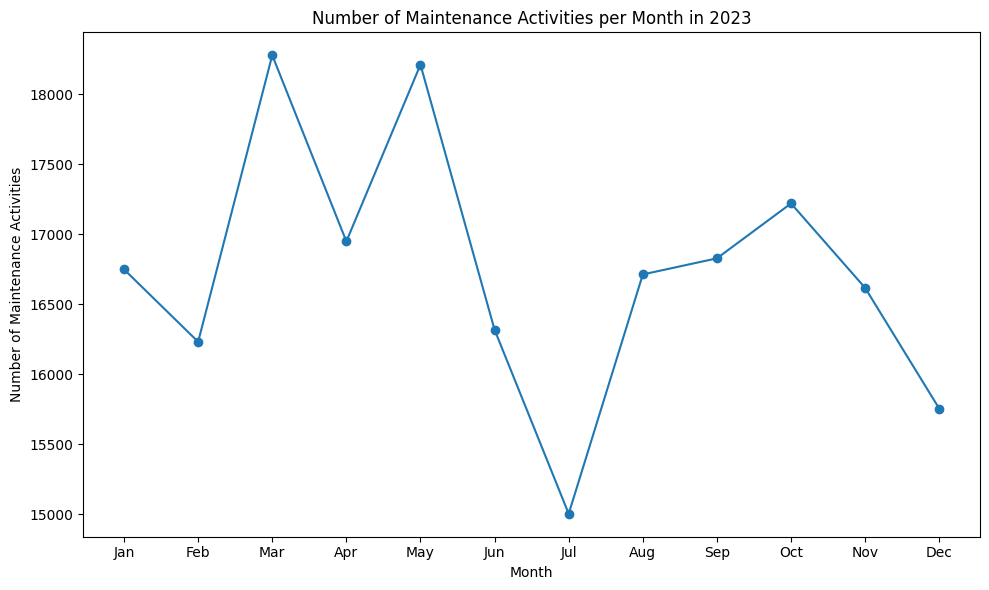

In [20]:
# Assuming 'EXECUTION_START_DATE' is already converted to datetime
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])

# Filter data for a specific year
specific_year = 2023
data_specific_year = data_swire_copy[data_swire_copy['EXECUTION_START_DATE'].dt.year == specific_year]

# Grouping by month within the specific year
monthly_counts = data_specific_year['EXECUTION_START_DATE'].groupby(data_specific_year['EXECUTION_START_DATE'].dt.month).count()

# Plotting the number of maintenance activities per month in the specific year
monthly_counts.plot(kind='line', marker='o', figsize=(10, 6))
plt.title(f'Number of Maintenance Activities per Month in {specific_year}')
plt.xlabel('Month')
plt.ylabel('Number of Maintenance Activities')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()


The line graph depicts the number of maintenance activities per month for the year 2023. Notably, there are fluctuations throughout the year, with peaks in March and August, and a significant drop in maintenance activities in July. This trend may suggest that preventive maintenance or machine installations done in certain months, such as June, effectively reduced downtime in the following months. The noticeable drop in maintenance activities in July after high activity in June may indicate that the measures taken during June were successful in temporarily reducing the need for maintenance. Similarly, the increase in maintenance activities in subsequent months, such as August and November, points to the need for more consistent preventive measures to ensure stability in machine operations. Overall, the data suggests that timely intervention can lead to reductions in downtime, but continuous monitoring and preventive actions are necessary to maintain optimal operational efficiency.

### 5.5. Frequency of maintenance activity type <a name = "5.5"></a>

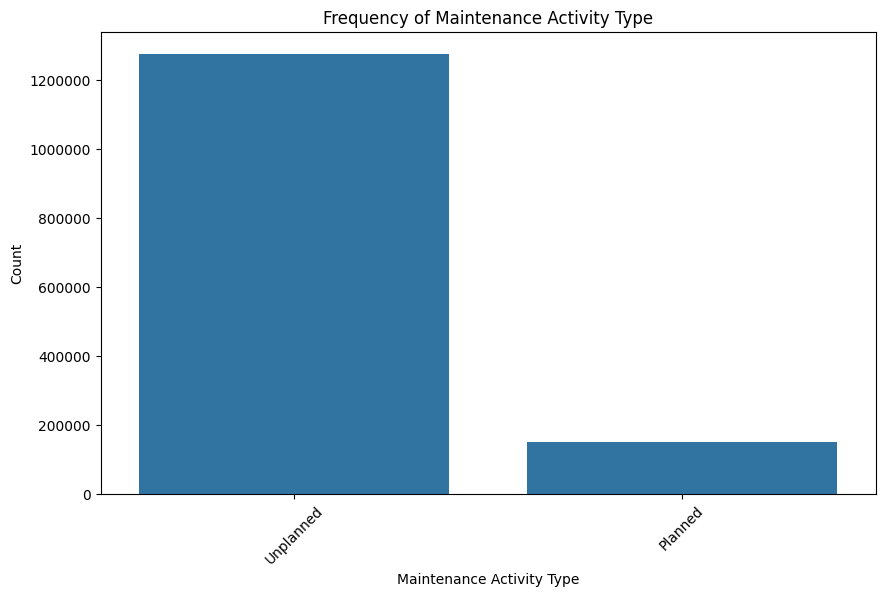

In [21]:
# Bar chart for MAINTENANCE_ACTIVITY_TYPE
plt.figure(figsize=(10, 6))
sns.countplot(x='MAINTENANCE_ACTIVITY_TYPE', data=data_swire_copy)
plt.title('Frequency of Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

The bar chart shows the frequency of maintenance activities, categorizing them into "Planned" and "Unplanned" types. It is evident that the majority of maintenance activities are unplanned, with over 1.2 million occurrences compared to significantly fewer planned maintenance activities. Which suggests that most of the downtimes occur without any warning and can be the leading cause of Financial loss, highlighting the need for predictive maintenance.

In [22]:
data_swire_copy['MAINTENANCE_ACTIVITY_TYPE'].value_counts()

MAINTENANCE_ACTIVITY_TYPE
Unplanned    1276877
Planned       150387
Name: count, dtype: int64

The value counts for MAINTENANCE_ACTIVITY_TYPE indicate that the dataset predominantly consists of unplanned maintenance activities, with 1,276,877 occurrences, compared to only 150,387 planned maintenance activities. This suggests that the current maintenance strategy is largely reactive, dealing with breakdowns as they occur rather than proactively planning maintenance to prevent failures. The significantly higher count of unplanned maintenance events highlights an area for improvement, emphasizing the need for a more proactive, predictive maintenance approach to minimize unexpected downtimes and enhance operational efficiency.

## 6.Bivariate analysis <a name = "6"></a>

 Bivariate analysis is crucial in our case to explore the relationships between two variables, such as the connection between equipment age (EQUIP_AGE) and downtime (ACTUAL_WORK_IN_MINUTES), or between MAINTENANCE_ACTIVITY_TYPE (planned vs. unplanned) and downtime. Understanding these relationships helps us identify which features have the most influence on machine breakdowns or prolonged downtimes, allowing us to determine key drivers behind equipment failures. 

### 6.1 Average downtime by maintenance activity type <a name = "6.1"></a>

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/2340441418.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', data=grouped_data, palette='viridis')


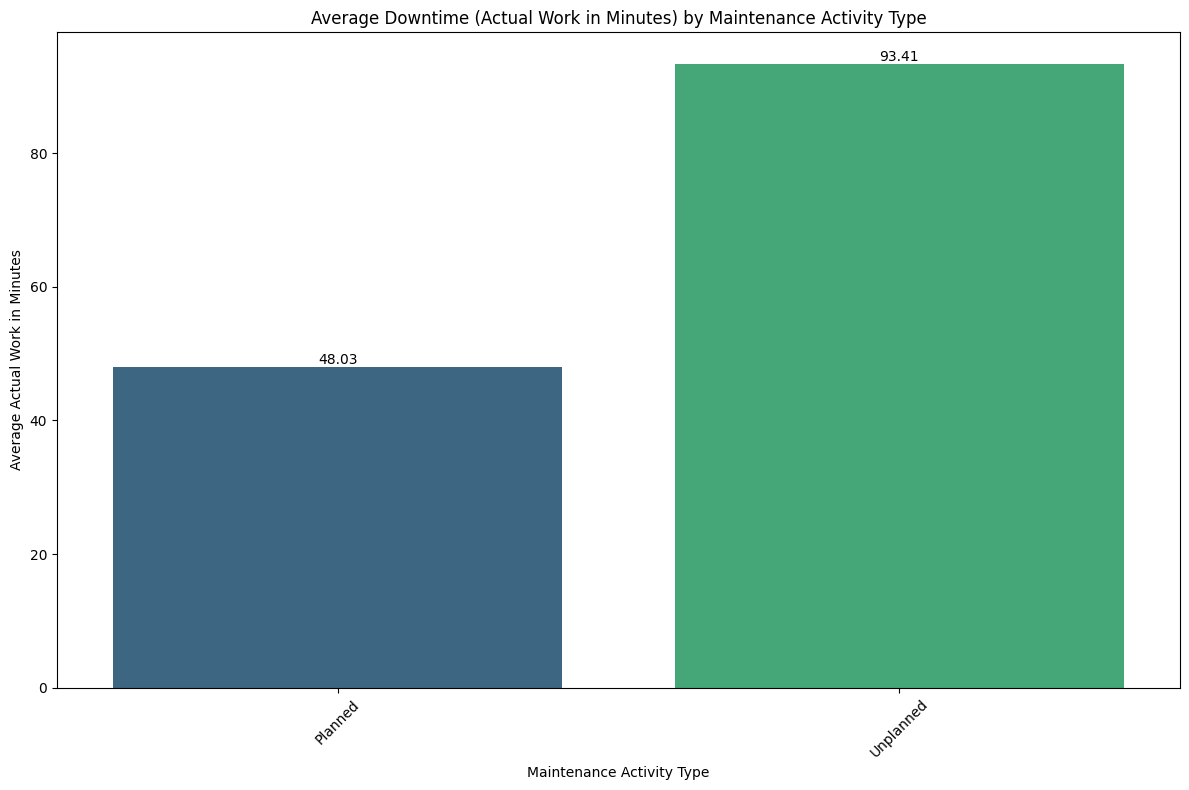

In [23]:
# Grouping the data by MAINTENANCE_ACTIVITY_TYPE and calculating the mean of ACTUAL_WORK_IN_MINUTES
grouped_data = data_swire_copy.groupby('MAINTENANCE_ACTIVITY_TYPE')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Plotting the average downtime (ACTUAL_WORK_IN_MINUTES) for each Maintenance Activity Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', data=grouped_data, palette='viridis')

# Customizing the plot
plt.title('Average Downtime (Actual Work in Minutes) by Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=45)

# Adding values to each bar in the plot
for index, row in grouped_data.iterrows():
    bar_plot.text(index, row['ACTUAL_WORK_IN_MINUTES'], f'{row["ACTUAL_WORK_IN_MINUTES"]:.2f}', 
                  ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


From the above graph of average downtime by maintenance activity, we can see that for unplanned downtimes, the average time required to resolve the issues is 93.41 minutes, whereas for planned activities, it is 48.03 minutes.  Therefore, emphasizing more planned maintenance activities could substantially reduce downtime, enhance operational stability, and lower maintenance-related costs for Swire Coca-Cola.

### 6.2 Average downtime by plant <a name = "6.2"></a>

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/63549748.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='PLANT_ID', y='ACTUAL_WORK_IN_MINUTES', data=grouped_data, palette='viridis', errorbar=None)


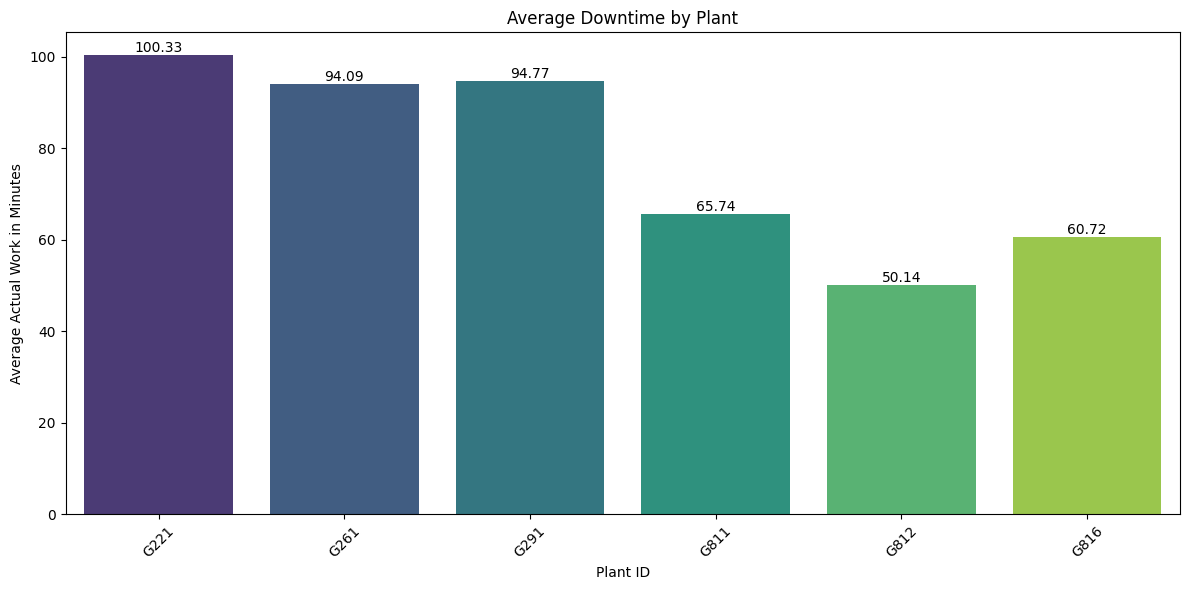

In [24]:
grouped_data = data_swire_copy.groupby('PLANT_ID')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Plotting the average downtime (ACTUAL_WORK_IN_MINUTES) for each Plant
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='PLANT_ID', y='ACTUAL_WORK_IN_MINUTES', data=grouped_data, palette='viridis', errorbar=None)  

# Customizing the plot
plt.title('Average Downtime by Plant')
plt.xlabel('Plant ID')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=45)

# Adding values to each bar in the plot
for index, row in grouped_data.iterrows():
    bar_plot.text(index, row['ACTUAL_WORK_IN_MINUTES'], f'{row["ACTUAL_WORK_IN_MINUTES"]:.2f}', 
                  ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()


From the above graph of average downtime by plant, we can see that plant G221 has the highest average downtime of 100 minutes, where plants G261 and G291 are six minutes behind, and plant G812 has the lowest downtime of 50.14. From this, the plants G221, G261 and G291 need more attention to reduce the average time by anticipating the breakdowns beforehand.

 ### 6.3 Count of Maintenance type by maintenance activity type <a name = "6.3"></a>

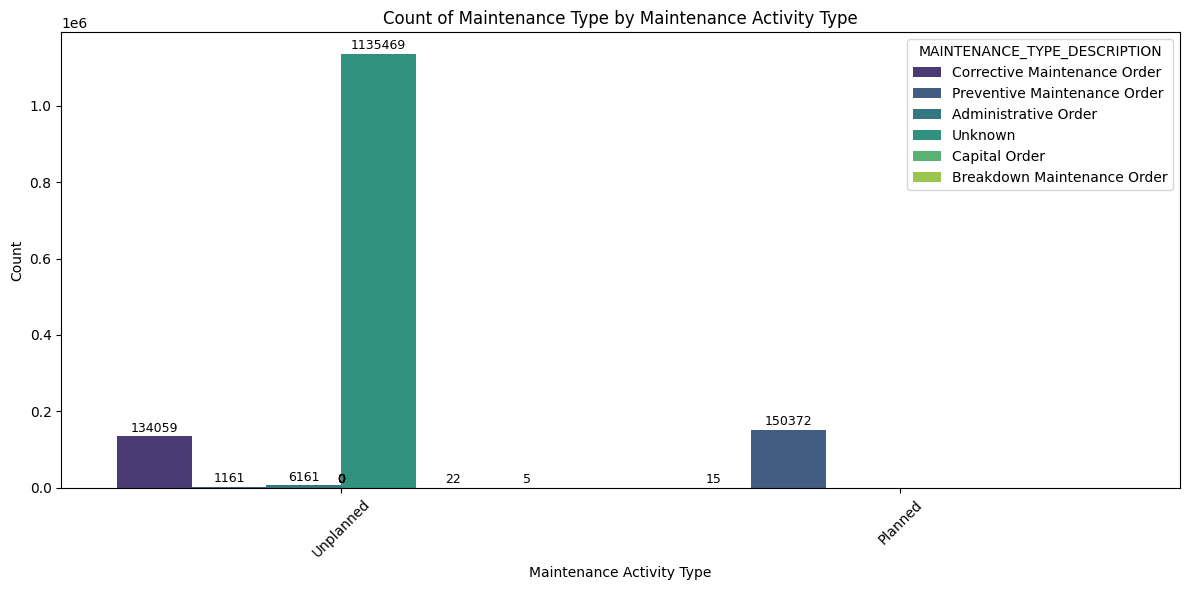

In [25]:
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(x='MAINTENANCE_ACTIVITY_TYPE', hue='MAINTENANCE_TYPE_DESCRIPTION', data=data_swire_copy, palette='viridis')
plt.title('Count of Maintenance Type by Maintenance Activity Type')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 6), textcoords='offset points', fontsize=9, color='black')
plt.tight_layout()
plt.show()


The bar chart provides a breakdown of maintenance activities by type. The majority of unplanned maintenance activities are classified as "Unknown," with over 1.1 million instances. This highlights a significant gap in documenting the specific type of maintenance performed, suggesting the need for better classification and tracking processes. Meanwhile, preventive maintenance activities account for a much smaller share compared to corrective maintenance orders, indicating that proactive measures are being underutilized. Increasing planned maintenance could help reduce the frequency of corrective and unknown maintenance activities, improving operational efficiency.

### 6.4 Production line Analysis using Functional Area <a name = "6.4"></a>

The reason for choosing Functional Area Nodes 4 and 5 in the analysis is because these nodes represent more granular levels of the production and equipment hierarchy, providing deeper insights into the production line's operations. Functional Area Node 4 typically corresponds to specific processes or sub-processes within a plant, while Node 5 further narrows down to individual machine types or components. By analyzing Nodes 4 and 5, we can identify which specific parts of the production line or machinery are contributing the most to downtime, allowing for targeted interventions.

In [26]:
print(data_swire_copy['FUNCTIONAL_AREA_NODE_4_MODIFIED'].value_counts())


FUNCTIONAL_AREA_NODE_4_MODIFIED
Unknown                     1189691
FILLER                        46322
PACKER                        35230
CONVEYOR                      34765
LABELER                       18945
                             ...   
BATCH STATION METER SKID          1
MIXERS                            1
G811 CONDENSATE RETURN            1
CIP TANK SKID                     1
CIP VALVE MATRIX SKID             1
Name: count, Length: 87, dtype: int64


In [27]:
print(data_swire_copy['FUNCTIONAL_AREA_NODE_5_MODIFIED'].value_counts())

FUNCTIONAL_AREA_NODE_5_MODIFIED
Unknown                                     1425084
FULL CAN TO ACCUMULATION TABLE                  251
PACKER 1, MODEL DUODOZEN 1250SX                 210
FULL CASE CONVEYORS                             158
EMPTY CASE CONVEYORS                            136
FULL CASE SPIRAL TO PALLETIZER                  125
FB CONVEYORS TO DOUGLAS/HI-CONE SPLIT           114
COMPRESSOR                                      110
EMPTY CAN                                       110
PACKER 2, MODEL FENIX 185V                      108
FULL CASE CONVEYOR                              101
EAST SYRUP TANKS                                 98
FULL BOTTLE CONVEYORS                            97
EMPTY CAN CONVEYOR                               90
*OLD SYSTEM MT CASE CONVEYORS*                   56
LOOSE FB TO PACKER CONVEYORS                     52
FULL CAN CONVEYOR                                50
EVANS COOLING TUNNEL L3, INSIDE BUILDING         48
HARTNESS TO PAI FULL CASE CONVEY

 ### 6.4.1 Average downtime by functional area node 4 <a name = "6.4.1"></a>

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/3664770662.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FUNCTIONAL_AREA_NODE_4_MODIFIED', y='ACTUAL_WORK_IN_MINUTES', data=avg_downtime, palette='viridis')


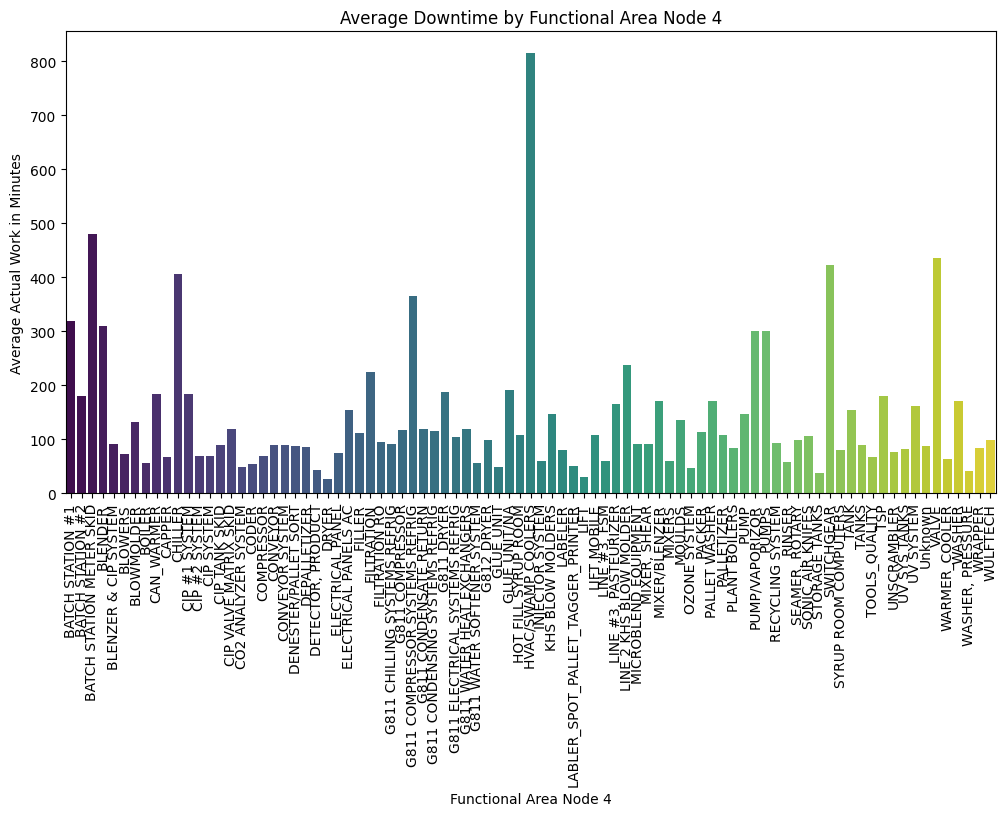

In [28]:
avg_downtime = data_swire_copy.groupby('FUNCTIONAL_AREA_NODE_4_MODIFIED')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='FUNCTIONAL_AREA_NODE_4_MODIFIED', y='ACTUAL_WORK_IN_MINUTES', data=avg_downtime, palette='viridis')
plt.title('Average Downtime by Functional Area Node 4')
plt.xlabel('Functional Area Node 4')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=90)
plt.show()

From the above graph, average downtime by functional area node four, we can see the variation of downtime in various areas, where the average downtime is 50 to 100 minutes for some regions. The data reveals that "HVAC/SWAMP COOLERS" experienced the highest average downtime of approximately 815 minutes, indicating a significant maintenance burden. Several other functional areas, such as "BATCH STATION METER XX" and "G811 COMPRESSOR SYSTEMS," also show extended downtimes exceeding 400 minutes, which highlights potential inefficiencies in these nodes. Understanding these prolonged downtimes can help target specific areas for optimization and preventive maintenance strategies to reduce operational delays and improve overall plant efficiency.

 ### 6.4.2 Average downtime by functional area node 5 <a name = "6.4.2"></a>

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/2636800071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACTUAL_WORK_IN_MINUTES', y='FUNCTIONAL_AREA_NODE_5_MODIFIED', data=average_downtime_node5, palette='viridis')


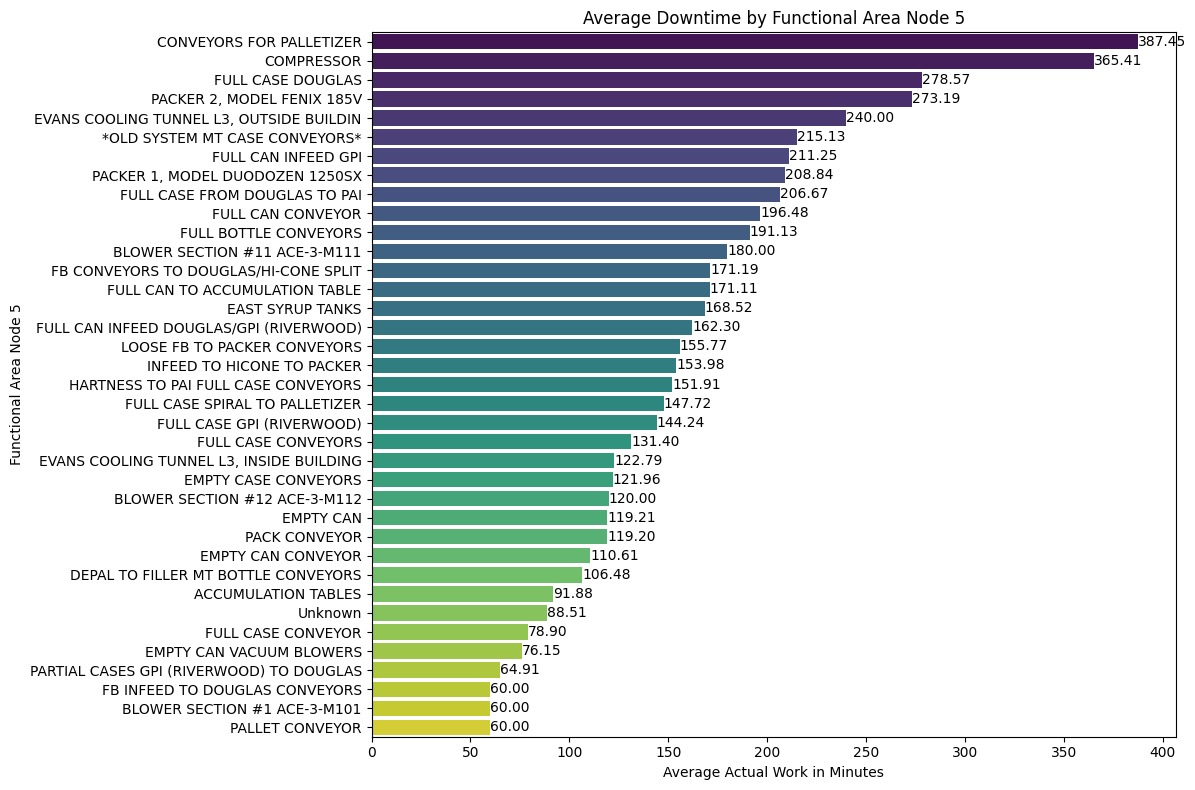

In [29]:
# Grouping the data by FUNCTIONAL_AREA_NODE_5_MODIFIED and calculating the average downtime (ACTUAL_WORK_IN_MINUTES)
average_downtime_node5 = data_swire_copy.groupby('FUNCTIONAL_AREA_NODE_5_MODIFIED')['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Sorting the values for better visualization
average_downtime_node5 = average_downtime_node5.sort_values(by='ACTUAL_WORK_IN_MINUTES', ascending=False)

# Plotting the average downtime by Functional Area Node 5
plt.figure(figsize=(12, 8))
sns.barplot(x='ACTUAL_WORK_IN_MINUTES', y='FUNCTIONAL_AREA_NODE_5_MODIFIED', data=average_downtime_node5, palette='viridis')
plt.title('Average Downtime by Functional Area Node 5')
plt.xlabel('Average Actual Work in Minutes')
plt.ylabel('Functional Area Node 5')

for index, value in enumerate(average_downtime_node5['ACTUAL_WORK_IN_MINUTES']):
    plt.text(value, index, f'{value:.2f}', va='center', ha='left')
    
plt.tight_layout()
plt.show()

The bar chart visualizes the average downtime by various functional area nodes. It highlights that "CONVEYORS FOR PALLETIZER" and "COMPRESSOR" have the highest average downtime, indicating these areas experience significant maintenance delays. Conversely, equipment like "BLOWER SECTION #1 ACE-3-M101" and "PALLET CONVEYOR" have minimal downtime, suggesting they are more efficient or require less maintenance. This information is crucial for prioritizing maintenance efforts and focusing on areas that cause the most disruptions to improve overall efficiency.

 ### 6.5 Frequency of Maintenance Type Across Equipment Categories <a name = "6.5"></a>

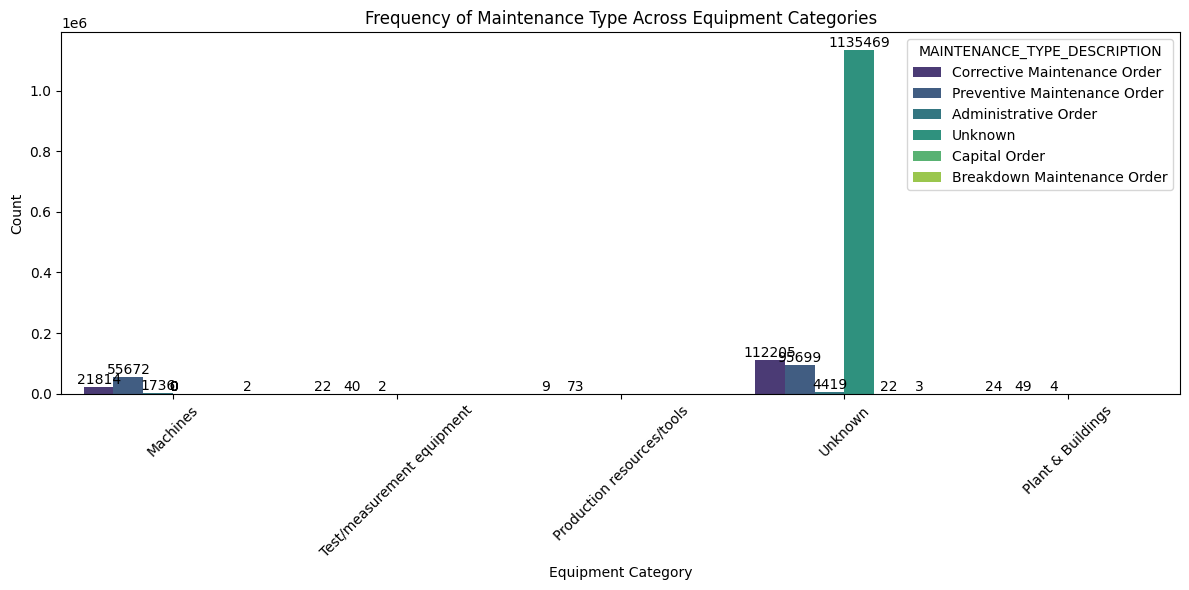

In [30]:
plt.figure(figsize=(12, 6))
count_plot = sns.countplot(x='EQUIP_CAT_DESC', hue='MAINTENANCE_TYPE_DESCRIPTION', data=data_swire_copy, palette='viridis')
plt.title('Frequency of Maintenance Type Across Equipment Categories')
plt.xlabel('Equipment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Adding values on top of each bar
for p in count_plot.patches:
    count_plot.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

This bar plot illustrates the frequency of different maintenance types across various equipment categories. The "Unknown" category dominates the chart, with over 1.1 million occurrences, which highlights potential data quality issues or gaps in proper classification. The "Machines" category shows a relatively high count of corrective maintenance compared to preventive, indicating that these assets are primarily addressed post-failure, which suggests inefficiencies in maintenance practices. It is also clear that other equipment categories, such as "Production resources/tools," "Test measurement equipment," and "Plant & Buildings," have extremely low or no maintenance records, which could either reflect lack of incidents or insufficient logging of maintenance activities. Addressing these unknowns and optimizing preventive measures could reduce unexpected breakdowns, thereby improving productivity and efficiency.

 ### 6.6 Scatter Plot of Equipment Age vs Actual Work in Minutes <a name = "6.6"></a>

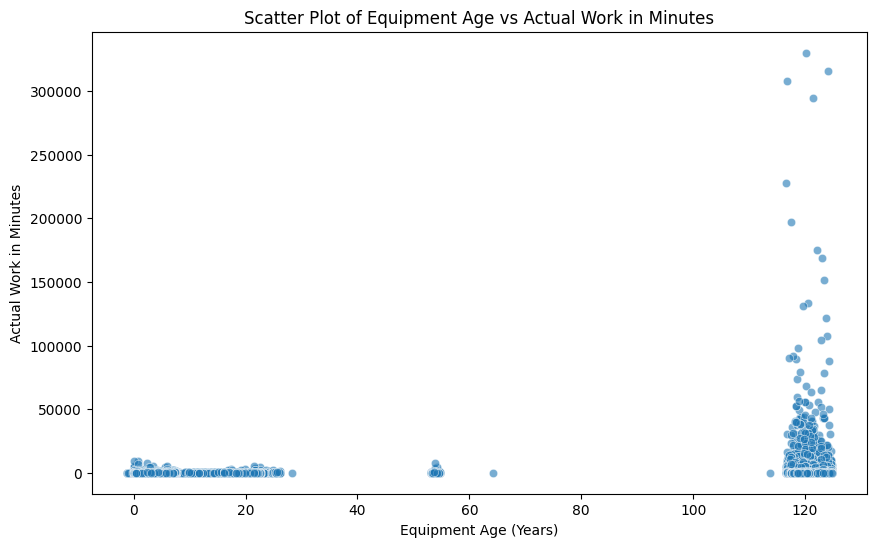

In [31]:
data_swire_copy['EQUIP_AGE'] = (data_swire_copy['EXECUTION_START_DATE'] - data_swire_copy['EQUIP_START_UP_DATE']).dt.days / 365

plt.figure(figsize=(10, 6))
sns.scatterplot(x='EQUIP_AGE', y='ACTUAL_WORK_IN_MINUTES', data=data_swire_copy, alpha=0.6)
plt.title("Scatter Plot of Equipment Age vs Actual Work in Minutes")
plt.xlabel("Equipment Age (Years)")
plt.ylabel("Actual Work in Minutes")
plt.show()

This scatter plot illustrates the relationship between equipment age (in years) and the actual work time (in minutes) required for maintenance. The plot shows a dense cluster of points at lower equipment ages, particularly between 0 and 20 years, indicating that most equipment falls into this age range and has shorter downtime. However, as equipment age increases beyond 100 years, the downtime becomes significantly higher, with some extreme values above 300,000 minutes. This suggests that older equipment is more prone to longer maintenance periods, which could imply increased inefficiencies or risks associated with aging machinery. Notably, the points at high equipment age could represent either legacy equipment or errors in data entry, requiring further investigation.

## 7.Multivariate analysis <a name = "7"></a>

 In our predictive maintenance project, multivariate analysis is performed to understand how multiple factors interact and collectively influence outcomes like downtime and maintenance type. For instance, we can analyze the combined effect of equipment age, maintenance type, and functional area on the likelihood of machine failure. This analysis helps to identify complex relationships and dependencies that might be affecting machine performance and downtime. 

### 7.1 Average Downtime by Maintenance Activity Type for Different Plants <a name = "7.1"></a>

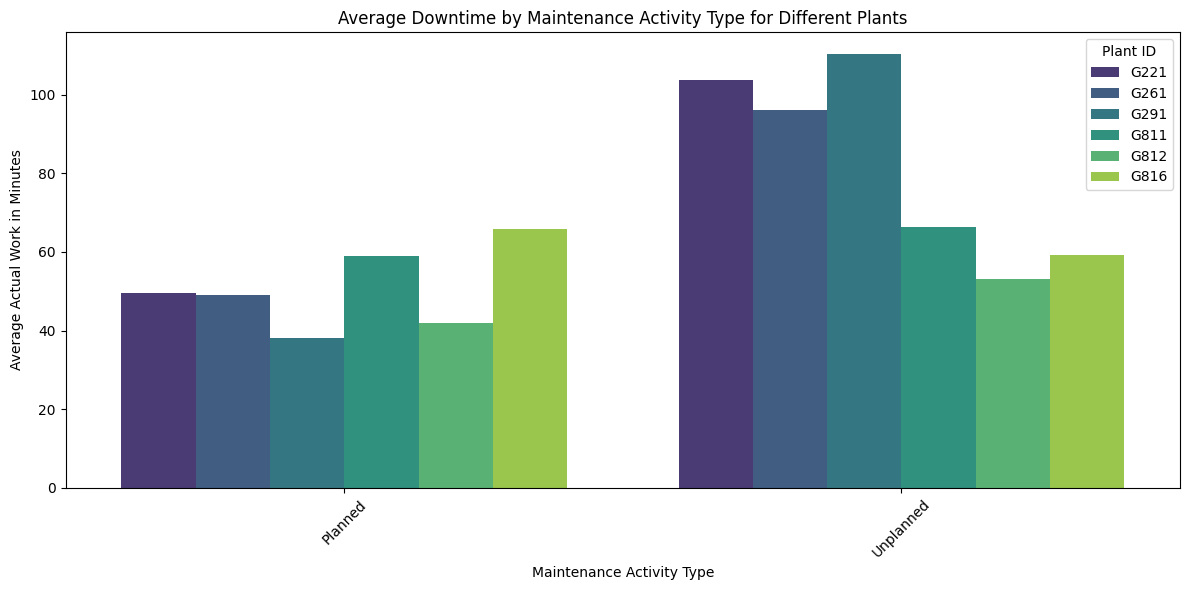

In [32]:
# Grouping data by MAINTENANCE_ACTIVITY_TYPE and PLANT_ID and calculating the mean of ACTUAL_WORK_IN_MINUTES
grouped_data = data_swire_copy.groupby(['MAINTENANCE_ACTIVITY_TYPE', 'PLANT_ID'])['ACTUAL_WORK_IN_MINUTES'].mean().reset_index()

# Plotting a bar plot with hue to differentiate plants
plt.figure(figsize=(12, 6))
sns.barplot(x='MAINTENANCE_ACTIVITY_TYPE', y='ACTUAL_WORK_IN_MINUTES', hue='PLANT_ID', data=grouped_data, palette='viridis')

# Customizing the plot
plt.title('Average Downtime by Maintenance Activity Type for Different Plants')
plt.xlabel('Maintenance Activity Type')
plt.ylabel('Average Actual Work in Minutes')
plt.xticks(rotation=45)
plt.legend(title='Plant ID')
plt.tight_layout()
plt.show()

From the above graph of average downtime by maintenance activity type for different plants, we can see that the G291, G221, and G261 plants tend to have the highest unplanned downtime with an average time of 100 minutes for Maintenance, which says that these plants need more attention as the unplanned downtimes tend to take more time to resolve the issue.

### 7.2 Maintenance Type by Equipment Age and Downtime  <a name = "7.2"></a>

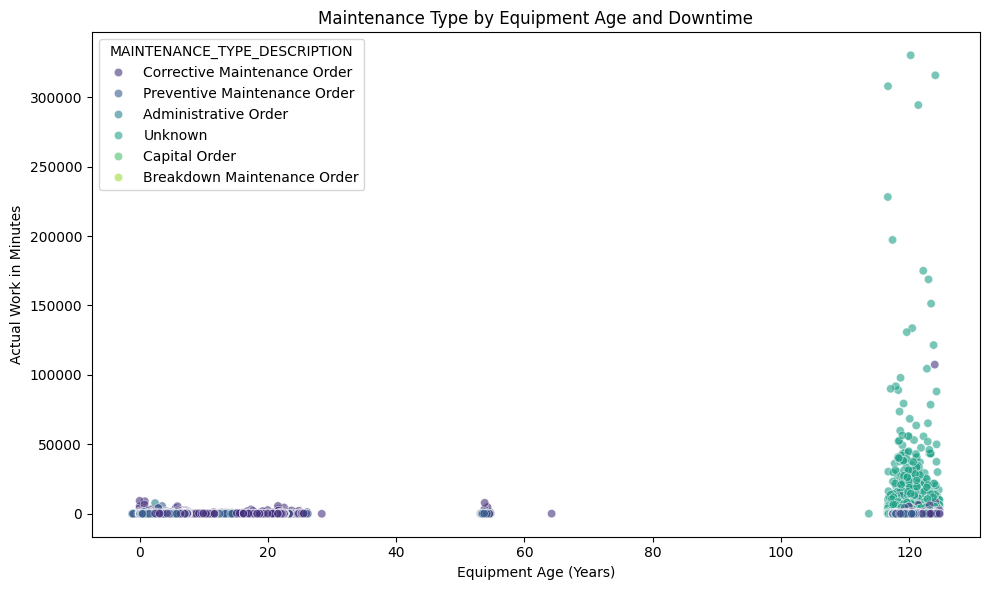

In [33]:
# Scatter plot to visualize the relationship between equipment age and maintenance type
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EQUIP_AGE', y='ACTUAL_WORK_IN_MINUTES', hue='MAINTENANCE_TYPE_DESCRIPTION', data=data_swire_copy, alpha=0.6, palette='viridis')
plt.title('Maintenance Type by Equipment Age and Downtime')
plt.xlabel('Equipment Age (Years)')
plt.ylabel('Actual Work in Minutes')
plt.tight_layout()
plt.show()

This scatter plot shows the relationship between equipment age and downtime in minutes, categorized by different maintenance types. We observe that most of the equipment falls below 20 years of age, with relatively lower downtimes, predominantly consisting of corrective and preventive maintenance. However, for equipment older than 120 years, there is a significant increase in downtime, with a large cluster in the "Unknown" maintenance category, indicating that older machinery is prone to extended periods of inactivity and suggests either poor logging practices or neglected maintenance planning. The absence of preventive measures for aging equipment is evident and highlights the need to adopt proactive maintenance strategies to reduce unplanned downtime. Additionally, the plot suggests that as equipment ages, it is more likely to require diverse types of maintenance, and this could directly impact operational efficiency and productivity.

## 8. Outlier Analysis <a name = "8"></a>

Outlier analysis is crucial in our predictive maintenance case for Swire Coca-Cola, as it helps identify unusual patterns or anomalies that could indicate underlying issues in machine performance or data inconsistencies.

In [34]:
# Calculate Q1  and Q3 
Q1 = data_swire_copy['ACTUAL_WORK_IN_MINUTES'].quantile(0.25)
Q3 = data_swire_copy['ACTUAL_WORK_IN_MINUTES'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data_swire_copy[(data_swire_copy['ACTUAL_WORK_IN_MINUTES'] < lower_bound) | 
                           (data_swire_copy['ACTUAL_WORK_IN_MINUTES'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 101066


In [35]:
# Remove outliers from the dataset
data_swire_copy_no_outliers = data_swire_copy[(data_swire_copy['ACTUAL_WORK_IN_MINUTES'] >= lower_bound) & 
                                              (data_swire_copy['ACTUAL_WORK_IN_MINUTES'] <= upper_bound)]
print(f"Number of rows after removing outliers: {len(data_swire_copy_no_outliers)}")


Number of rows after removing outliers: 1326198


In the analysis of outliers for the ACTUAL_WORK_IN_MINUTES variable, a total of 101,066 outliers were identified. This suggests that a significant number of observations fall outside the typical range defined by the interquartile range (IQR) method, which could indicate unusual patterns or anomalies. Removing these outliers leaves us with 1,326,198 data points, which is a considerable amount, ensuring that our dataset still captures enough variability while reducing the influence of extreme values that could distort our analysis.

/var/folders/zx/v3t5jtw550lftztw2wb8qqk80000gq/T/ipykernel_39088/2640660940.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data_swire_copy['ACTUAL_WORK_IN_MINUTES'], palette='viridis')


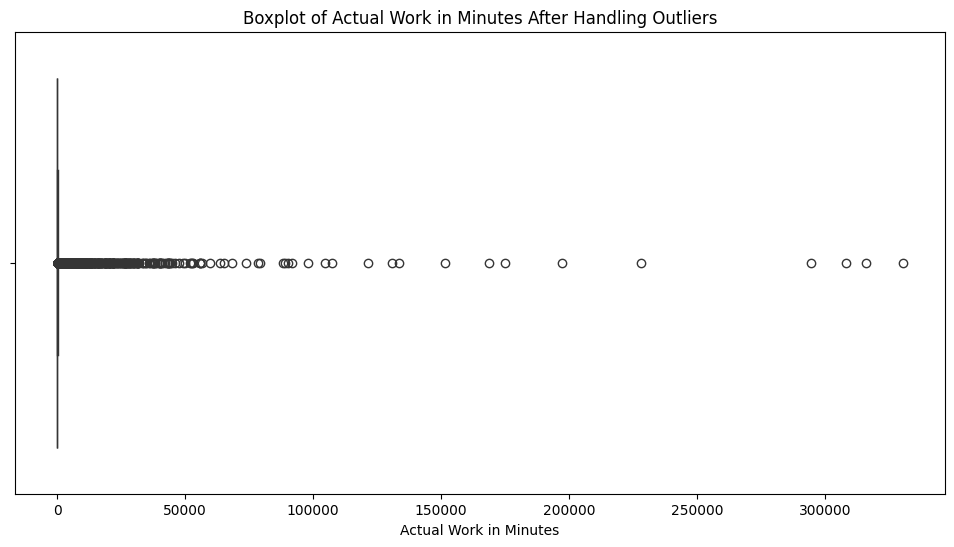

In [36]:
# Boxplot after handling outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_swire_copy['ACTUAL_WORK_IN_MINUTES'], palette='viridis')
plt.title('Boxplot of Actual Work in Minutes After Handling Outliers')
plt.xlabel('Actual Work in Minutes')
plt.show()


The boxplot of the "Actual Work in Minutes" after handling outliers shows that the data contains significant extreme values. The majority of the actual work minutes are concentrated near the lower end of the scale, with a very long tail extending towards higher values, indicating the presence of several high outliers. These extreme outliers go up to over 300,000 minutes, which represents unusually long durations of work. The whiskers of the boxplot are very short in comparison, suggesting that most of the data points are much smaller, while the extreme values pull the distribution to the right. After removing some outliers, the dataset was reduced to 1,326,198 rows, showing that outlier handling was done conservatively, leaving many influential outliers for further analysis.

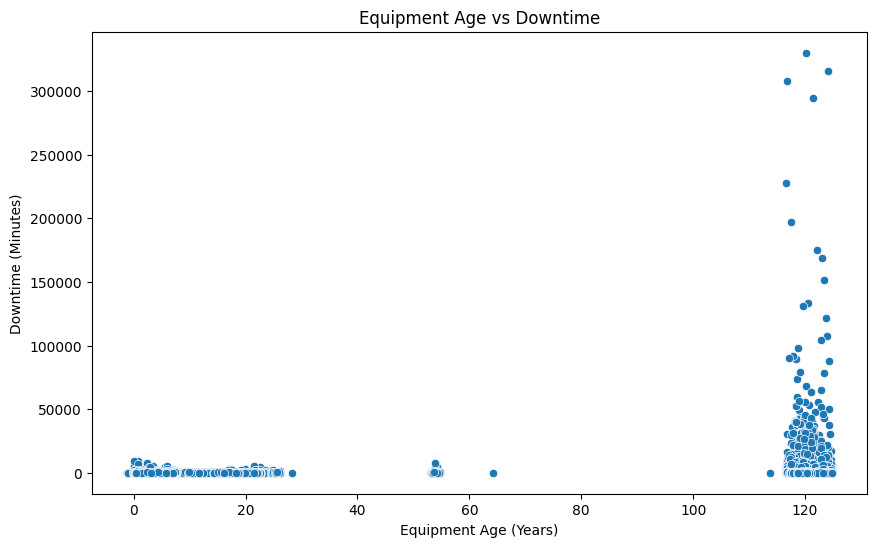

In [37]:
# Convert dates to datetime format
data_swire_copy['EQUIP_START_UP_DATE'] = pd.to_datetime(data_swire_copy['EQUIP_START_UP_DATE'])
data_swire_copy['EXECUTION_START_DATE'] = pd.to_datetime(data_swire_copy['EXECUTION_START_DATE'])


# Scatter plot of equipment age vs downtime
plt.figure(figsize=(10,6))
sns.scatterplot(x='EQUIP_AGE', y='ACTUAL_WORK_IN_MINUTES', data=data_swire_copy)
plt.title("Equipment Age vs Downtime")
plt.xlabel("Equipment Age (Years)")
plt.ylabel("Downtime (Minutes)")
plt.show()


The scatter plot of equipment age versus downtime reveals an interesting trend, where equipment with an age around 120 years exhibits significantly higher downtimes, with several instances reaching values above 300,000 minutes. This clustering of high downtime values suggests the presence of outliers, especially for older equipment. These outliers may indicate that older machines are prone to severe failures, which lead to longer maintenance periods.

## 9. Summary of EDA <a name = "9"></a>

* Based on the Exploratory Data Analysis (EDA) conducted for Swire Coca-Cola's maintenance dataset, several critical insights emerged that can significantly inform the company's approach to reducing machine downtimes. The analysis of missing values revealed substantial gaps in the data, particularly in fields related to maintenance planning, equipment information, and equipment start-up dates. These missing values were addressed through a series of imputation strategies—categorical variables were filled with either "Unknown" or their mode, while numerical fields such as dates were imputed using placeholder values or derived from existing data. This step was vital in ensuring a complete and usable dataset, minimizing the risks of inaccurate insights due to incomplete information.

* Univariate analysis provided valuable insights into individual variables, such as ACTUAL_WORK_IN_MINUTES, where we observed a wide range of downtime values. The significant variability, including a maximum downtime of over 330,000 minutes, points to inconsistencies in machine reliability. The maintenance activity type analysis highlighted the predominance of unplanned maintenance activities over planned ones, revealing a reactive approach to maintenance. This observation emphasizes the need for more structured and preventive maintenance strategies to mitigate costly unplanned breakdowns.

* Bivariate and multivariate analyses provided deeper insights into how different variables interact. For example, examining the average downtime across different maintenance activity types and equipment categories revealed that corrective actions were more frequent for poorly categorized or unknown equipment types. Moreover, the relationship between equipment age and downtime underscored that older machinery tends to experience longer downtimes, making them prime candidates for focused maintenance or replacement efforts.

* Outlier analysis further highlighted instances of excessively high downtime, which could either be a sign of inefficiencies in maintaining specific machines or issues with data entry. These insights collectively indicate a significant opportunity for Swire Coca-Cola to improve their maintenance strategy by transitioning from reactive to predictive maintenance, ensuring better categorization of equipment, and proactively managing older machinery to enhance operational efficiency and reduce costs associated with unexpected downtimes.



In conclusion, our Exploratory Data Analysis (EDA) of the IWC dataset provided valuable insights into Swire Coca-Cola's production operations and the current state of their maintenance strategy. Through a comprehensive examination of downtime, equipment age, and maintenance activities, we identified key areas for improvement, including the need to transition from a reactive to a proactive maintenance approach. Our analysis revealed significant gaps in asset management, highlighted by frequent unplanned maintenance and extended downtimes for older machinery. By leveraging these insights, Swire Coca-Cola can develop a more predictive and preventive maintenance model, ultimately reducing unexpected breakdowns, optimizing production efficiency, and minimizing costly disruptions.

## 10. Group Member Contributions <a name = "10"></a>

<html>
<head>
</head>
<body>
    <table border="1">
        <tr style="background-color: #4CAF50; color: white;">
            <th>Name</th>
            <th style="text-align: center;">Contribution's</th>
        </tr>
        <tr>
            <td>Adarsh</td>
            <td style ="text-align: left;"> <ul>
        <li>Explored data columns and created insightful visualizations, laying a solid foundation for our analysis.</li>
        <li>Articulated a comprehensive overview of the project's objectives.</li>
         <li>Provided interpretation of plots and thoroughly explored various data columns</li>
        <li>Performed document proofreading, ensuring accuracy and clarity throughout the document.</li>
      </ul></td>
        </tr>
        <tr>
            <td>Charith</td>
            <td style ="text-align: left;">
      <ul>
        <li>Data exploration and visualization to greatly support our understanding of the dataset.</li>
        <li>Handled missing values and outliers in the dataset to ensure data quality and reliability. </li>
         <li> Created visualizations and meticulously worked on the document's organization and readability.</li>
        <li>Performed document proofreading, ensuring accuracy and clarity throughout the document.</li>
      </ul>
    </td>
        </tr>
        <tr>
            <td>Dheeraj</td>
            <td style ="text-align: left;">
      <ul>
        <li>Data exploration and Provided valuable insights into visualizations and trends within the dataset.</li>
        <li>Handled missing values and analyzing potential areas of concern that impact machine downtime.</li>
         <li> Making careful decisions on how to impute missing values based on the nature of the variables.</li> 
        <li>Performed document proofreading, ensuring accuracy and clarity throughout the document.</li>
      </ul>
    </td>
        </tr>
    </table>
</body>
</html>

<center><a href="#Table-of-contents:">Navigate to top</a>